## Introdução

O seguinte notebook tem a finalidade de mostrar o código completo do algoritmo de regressão desenvolvido pelo grupo. A finalidade dele está mais bem desenvolvida no relatório disponibilizado no Github. De maneira mais simplificada, ele servirá para a partir de 4 atributos prever 1 target selecionado pelo grupo. O target nesse caso é a característica expressa pela coluna que recebe o nome de 'e'.

As células abaixo contarão com uma breve explicação do que realizam para uma melhor compreensão do processo por parte do leitor. Caso alguma dúvida permaneça é aconselhado ler o relatório que possui uma maior parte escrita e uma maior preocupação em explicação de conceitos que possam ter sido perdidos ao longo do caminho.

## Desenvolvimento

Nessa primeira célula foi apenas aberto o dataset com o uso da biblioteca pandas e utilizada a função read presente nele para isso. Printou-se tanto o banco de dados compelto quanto ele com apenas 25 das 673 linhas existentes, mas em um formato mais elegante.

In [31]:
import pandas as pd #abrindo meu dataset com o pandas
df = pd.read_csv('Ionic Liquids.csv', encoding='latin1')
print(df)
print()
print()
df.head(25)#printando apenas as 25 primeiras linhas do banco de dados

    Name of Cation/Anion      c      e      s      a      b      v
0      [H3TdP]+[l-Lact]-  0.000  0.000  0.000  3.241 -5.329  4.158
1         [H3TdP]+[+CS]-  0.000  0.000  0.229  2.749 -5.343  4.555
2      [C3MPyrr]+[Tf2N]- -0.236  0.000  0.908 -1.015 -4.691  3.446
3      [C4MPyrr]+[Tf2N]- -0.269  0.000  0.747 -1.094 -4.594  3.512
4      [C5MPyrr]+[Tf2N]- -0.303  0.000  0.727 -1.107 -4.622  3.630
..                   ...    ...    ...    ...    ...    ...    ...
668             DM3AmNO3 -0.196  0.072  0.754  1.335 -5.231  3.407
669              O4AmNO3  0.158  0.203  0.213  1.037 -5.420  3.414
670              Et3SNO3 -0.179 -1.417  2.909  1.312 -5.846  2.880
671             H3TdPNO3 -0.117  0.037  0.291  1.437 -5.456  3.634
672              OiQuNO3 -0.003 -0.219  1.394  1.546 -6.085  3.290

[673 rows x 7 columns]




,Name of Cation/Anion,c,e,s,a,b,v
0,[H3TdP]+[l-Lact]-,0.000,0.000,0.000,3.241,-5.329,4.158
1,[H3TdP]+[+CS]-,0.000,0.000,0.229,2.749,-5.343,4.555
2,[C3MPyrr]+[Tf2N]-,-0.236,0.000,0.908,-1.015,-4.691,3.446
3,[C4MPyrr]+[Tf2N]-,-0.269,0.000,0.747,-1.094,-4.594,3.512
4,[C5MPyrr]+[Tf2N]-,-0.303,0.000,0.727,-1.107,-4.622,3.630
5,[BMPyrr]+[Trif]-,0.000,0.448,0.628,0.362,-4.469,3.327
6,[MEIm]+ [EtSO4]-,-0.059,-0.013,0.609,1.526,-5.054,2.894
7,[BMIm]+[BF4]-,-0.012,0.540,0.287,-0.443,-4.346,2.911
8,([HexM3Am]+[(Tf)2N]-,-0.322,0.242,0.287,-1.383,-4.265,3.513
9,[BMPip]+[Tf2N]-,-0.129,0.494,0.235,-1.165,-4.385,3.422


O "describe" é uma função utilizada para mostrar algumas estatísticas descritivas do dataset. São então pontuados quantas linhas existem (673), qual a média de cada uma das informações (indicado na linha mean), o desvio padrão (indicado pela linha std), o mínimo e o máximo (indicados respectivamente por min e max) e por último alguns dos quartis sendo que o de 25% de 50% e de 75% estão informados nas linhas correspondentes intuitivamente.

In [32]:
df.describe() #descrevendo o dataset

,c,e,s,a,b,v
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,-0.252551,0.003957,0.755475,0.375264,-4.665187,3.403756
std,0.280737,0.401858,0.536511,1.666278,0.527990,0.398684
min,-1.326000,-2.317000,-1.740000,-3.103000,-6.236000,2.540000
25%,-0.399000,-0.178000,0.437000,-1.094000,-5.009000,3.105000
50%,-0.194000,0.050000,0.742000,0.458000,-4.683000,3.376000
75%,-0.044000,0.257000,1.007000,1.460000,-4.317000,3.646000
max,0.424000,0.991000,3.343000,4.989000,-2.523000,4.906000


Essa célula devolve algumas informações como o número de colunas e quantas linhas ele possui, quantas colunas, o nome das colunas, o tipo de dados contidos, se eles são ou não nulos e uma estimativa de uso de memória pelo dataframe.

In [33]:
df.info() #informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name of Cation/Anion  673 non-null    object 
 1   c                     673 non-null    float64
 2   e                     673 non-null    float64
 3   s                     673 non-null    float64
 4   a                     673 non-null    float64
 5   b                     673 non-null    float64
 6   v                     673 non-null    float64
dtypes: float64(6), object(1)
memory usage: 36.9+ KB


Na seguinte célula foram retirados os itens vazios e os que possuem valor igual a zero. Os que possuem valor igual a zero foram retirados pois não fica claro se o 0 é mesmo um valor medido ou se não foi possível realizar a medida nesse cenário, para não atrapalhar o desempenho do algoritmo optou-se por retirá-los. 

Após a retirada desses itens o banco de dados passou a possuir ao invés de 673 linhas 657, ou seja, a perda de informações foi relativamente pequena para esse ajuste realizado.

In [34]:
#retirando os itens vazios

df = df.dropna()

#retirando os itens com valor igual a 0
df = df[(df != 0).all(1)] #função all(1) serve para filtrar as linhas que possuem algum valor igual a 0
#retiramos os itens com valor igual a 0 pois eles podem representar medições erradas ou não feitas
df

,Name of Cation/Anion,c,e,s,a,b,v
6,[MEIm]+ [EtSO4]-,-0.059,-0.013,0.609,1.526,-5.054,2.894
7,[BMIm]+[BF4]-,-0.012,0.540,0.287,-0.443,-4.346,2.911
8,([HexM3Am]+[(Tf)2N]-,-0.322,0.242,0.287,-1.383,-4.265,3.513
9,[BMPip]+[Tf2N]-,-0.129,0.494,0.235,-1.165,-4.385,3.422
10,[BMPyrr]+[B(CN)4]-,-0.071,0.354,0.562,-1.030,-4.415,3.346
...,...,...,...,...,...,...,...
668,DM3AmNO3,-0.196,0.072,0.754,1.335,-5.231,3.407
669,O4AmNO3,0.158,0.203,0.213,1.037,-5.420,3.414
670,Et3SNO3,-0.179,-1.417,2.909,1.312,-5.846,2.880
671,H3TdPNO3,-0.117,0.037,0.291,1.437,-5.456,3.634


In [35]:
#rearrajanado o index porque as linhas removidas não são reindexadas automaticamente
df = df.reset_index(drop=True)
df

,Name of Cation/Anion,c,e,s,a,b,v
0,[MEIm]+ [EtSO4]-,-0.059,-0.013,0.609,1.526,-5.054,2.894
1,[BMIm]+[BF4]-,-0.012,0.540,0.287,-0.443,-4.346,2.911
2,([HexM3Am]+[(Tf)2N]-,-0.322,0.242,0.287,-1.383,-4.265,3.513
3,[BMPip]+[Tf2N]-,-0.129,0.494,0.235,-1.165,-4.385,3.422
4,[BMPyrr]+[B(CN)4]-,-0.071,0.354,0.562,-1.030,-4.415,3.346
...,...,...,...,...,...,...,...
652,DM3AmNO3,-0.196,0.072,0.754,1.335,-5.231,3.407
653,O4AmNO3,0.158,0.203,0.213,1.037,-5.420,3.414
654,Et3SNO3,-0.179,-1.417,2.909,1.312,-5.846,2.880
655,H3TdPNO3,-0.117,0.037,0.291,1.437,-5.456,3.634


Nessa etapa, vamos dividir os dados em dois conjuntos: treino e teste. O conjunto de treino será utilizado para ajustar o modelo, enquanto o conjunto de teste é reservado para avaliar o desempenho do modelo em dados que ele não viu durante o treinamento. A divisão é controlada pelo tamanho do teste (10%) e pela semente de aleatoriedade.

In [61]:
#hora de separar os dados 

from sklearn.model_selection import train_test_split

# separando os dados em treino e teste
TAMANHO_TESTE = 0.1
SEMENTE= 42
indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE, shuffle=True) 
df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste] #o df_teste será usado apenas no final 

Este bloco de código separa as variáveis de entrada (features) e a variável de saída (target) no conjunto de dados de treino. As features são as colunas que contêm os dados que serão usados para fazer previsões, enquanto o target é a variável que o modelo vai prever.

In [41]:
#separando os features e target no dataset de treino

target = ['e']
features = ['s', 'a', 'b', 'v']

dp_treino_target = df_treino.reindex(target, axis=1)
dp_treino_features = df_treino.reindex(features, axis=1)

 
X_treino = dp_treino_features.values
y_treino = dp_treino_target.values.ravel()

Vamos agora, analisar a distribuição dos dados numéricos que vamos usar

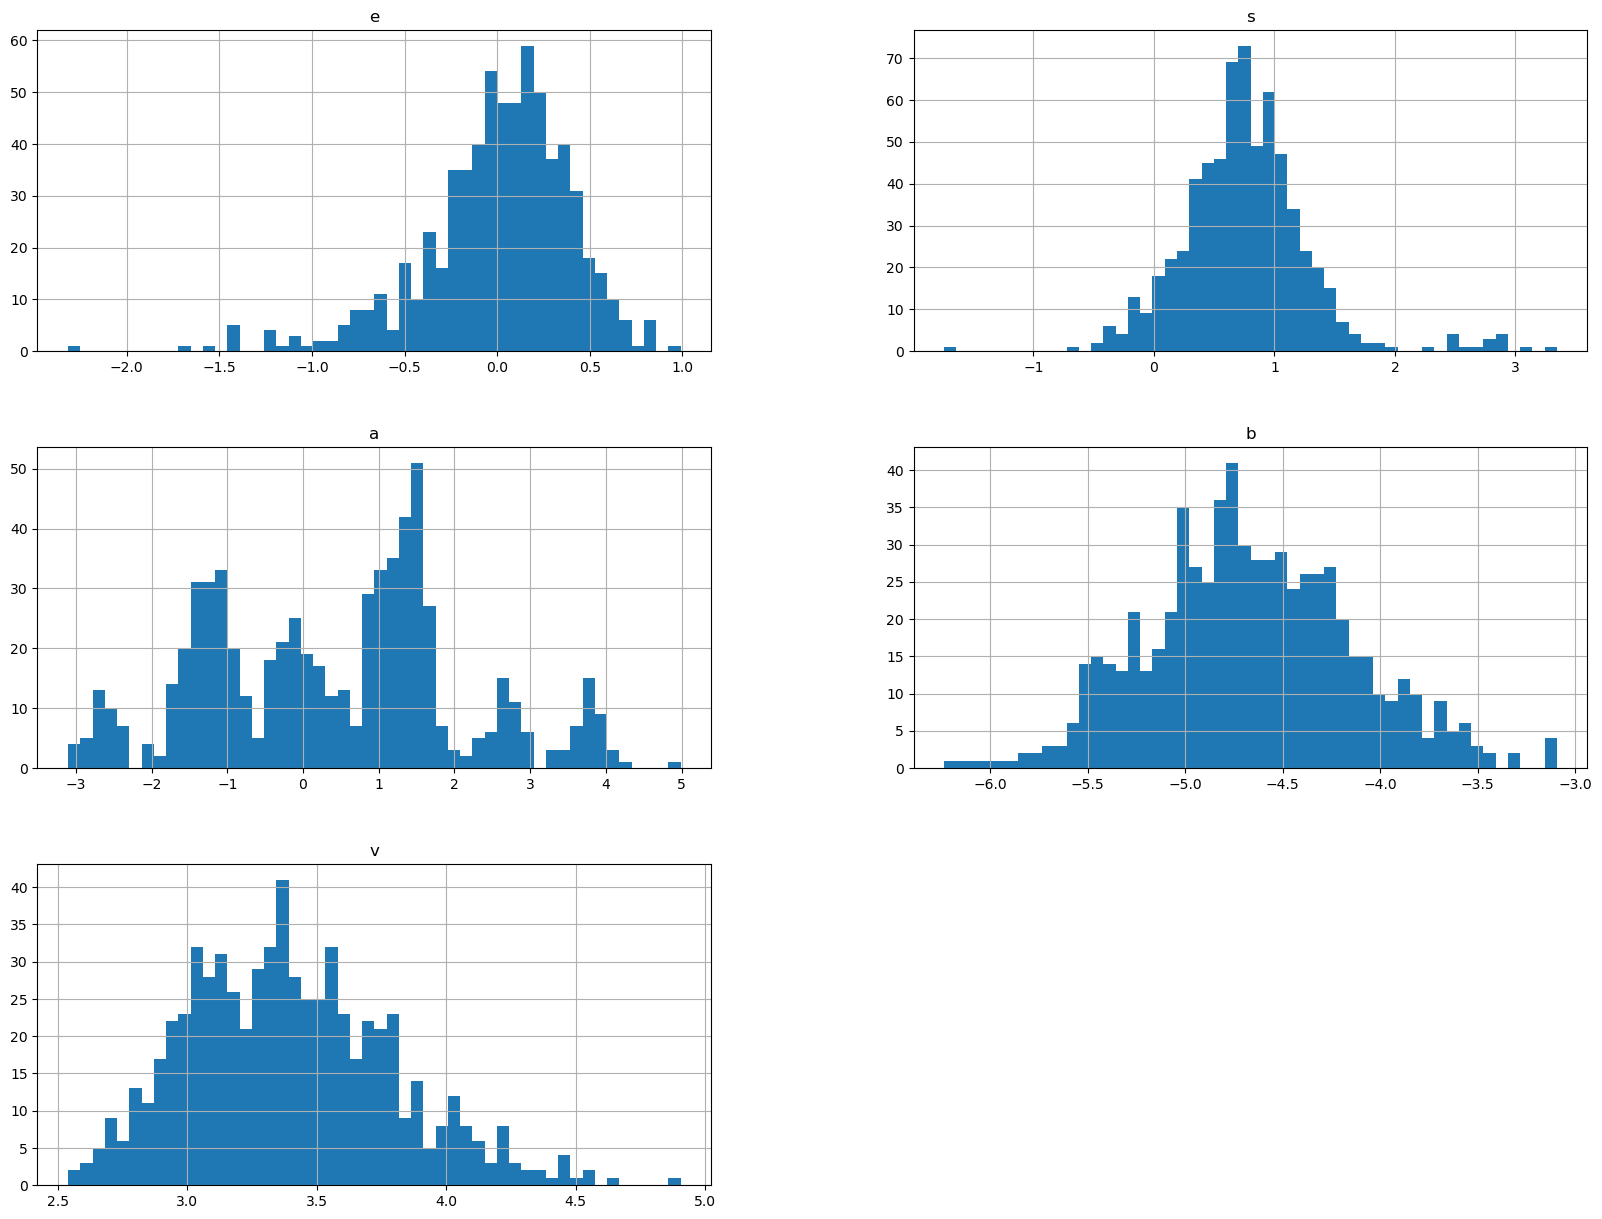

In [42]:
#hora de analisar a distribuição dos dados
#nao utilizaremos a coluna c pois ela é uma coluna de regressão linear que não foi especificada direito no dataset
colunas_numericas = ['e', 's', 'a', 'b', 'v']

import matplotlib.pyplot as plt

df[colunas_numericas].hist(bins=50, figsize=(20,15))
plt.show()



A maioria das colunas parece seguir uma distribuição normal, diríamos que a mais diferente é a coluna "a". Agora vamos verificar o número de outliers em cada coluna.

In [43]:
#encontrando outliers em cada coluna usando a média e o desvio padrão

for coluna in colunas_numericas:
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    limite_superior = media + 3 * desvio_padrao
    limite_inferior = media - 3 * desvio_padrao
    número_outliers = len(df[(df[coluna] > limite_superior) | (df[coluna] < limite_inferior)])

    print(f"\nColuna '{coluna}':")
    print(f"  Média: {media:.2f}")
    print(f"  Desvio Padrão: {desvio_padrao:.2f}")
    print(f"  Limite Inferior: {limite_inferior:.2f}")
    print(f"  Limite Superior: {limite_superior:.2f}")
    print(f"  Número de Outliers: {número_outliers}")



Coluna 'e':
  Média: 0.00
  Desvio Padrão: 0.41
  Limite Inferior: -1.21
  Limite Superior: 1.22
  Número de Outliers: 11

Coluna 's':
  Média: 0.76
  Desvio Padrão: 0.54
  Limite Inferior: -0.86
  Limite Superior: 2.38
  Número de Outliers: 16

Coluna 'a':
  Média: 0.40
  Desvio Padrão: 1.66
  Limite Inferior: -4.59
  Limite Superior: 5.38
  Número de Outliers: 0

Coluna 'b':
  Média: -4.67
  Desvio Padrão: 0.52
  Limite Inferior: -6.24
  Limite Superior: -3.09
  Número de Outliers: 0

Coluna 'v':
  Média: 3.40
  Desvio Padrão: 0.40
  Limite Inferior: 2.20
  Limite Superior: 4.59
  Número de Outliers: 2


Como podemos notar, o número de outliers é muito baixo, o que nos leva a crer que os dados são bem distribuídos. Isso aliado com a baixa sensibilidade do modelo de floresta aleatória a dados desbalanceados e aos dados com escalas semelhantes, nos leva a crer que não precisaremos de nenhuma técnica de normalização.

No próximo código vamos definir uma função que cria um modelo de Random Forest Regressor com hiperparâmetros ajustáveis usando o Optuna, uma biblioteca de otimização de hiperparâmetros. A função sugere diferentes valores para os hiperparâmetros do modelo, e então cria uma instância do RandomForestRegressor com esses parâmetros ajustados. A função retorna o modelo configurado, que será utilizado no processo de otimização.



In [62]:
from sklearn.ensemble import RandomForestRegressor

def cria_instancia_modelo(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo desejado.

    """
    parametros = {
        "n_estimators": trial.suggest_int("num_arvores", 10, 1000),
        "criterion": trial.suggest_categorical(
            "critério", ["squared_error", "friedman_mse", "absolute_error"] #nao é possível usar poisson pois esse critério não aceita valores negativos para y
        ),
        "min_samples_split": trial.suggest_int(
            "min_exemplos_split", 2, 20, log=True
        ),
        "min_samples_leaf": trial.suggest_int(
            "min_exemplos_folha", 1, 20, log=True
        ),
        "max_features": trial.suggest_float("num_max_atributos", 0, 1),
        "n_jobs": -1,
        "bootstrap": True,
        "random_state": SEMENTE,
    }

    model = RandomForestRegressor(**parametros)

    return model

Agora será definido a função objetivo para o Optuna, que será usada para otimizar os hiperparâmetros do modelo. A função treina e avalia o modelo de Random Forest (criado pela função cria_instancia_modelo) usando validação cruzada com um determinado número de divisões (num_folds). A métrica utilizada para avaliar o desempenho do modelo é o RMSE (Root Mean Squared Error), mas invertido para permitir a minimização (pois o Scikit-learn retorna a métrica negativa por padrão). O objetivo é minimizar a média do RMSE nas diferentes divisões da validação cruzada.



In [45]:
from sklearn.model_selection import cross_val_score

def funcao_objetivo(trial, X, y, num_folds):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451

    """
    modelo = cria_instancia_modelo(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )
    return -metricas.mean()

Este código cria um objeto de estudo do Optuna para otimizar os hiperparâmetros do modelo. O estudo utiliza um banco de dados SQLite para armazenar e carregar os resultados das tentativas de otimização, o que permite que o processo de otimização seja salvo e retomado posteriormente. A função create_study() define que o objetivo é minimizar uma métrica (por exemplo, o RMSE), e um estudo com nome específico é criado ou carregado caso já exista.

In [58]:

from optuna import create_study

NOME_DO_ESTUDO = "estudo_Ionic_Liquids5"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

[I 2024-10-06 12:45:54,611] A new study created in RDB with name: estudo_Ionic_Liquids5


Este código define o número de "folds" para a validação cruzada e cria uma função parcial que será usada no processo de otimização de hiperparâmetros com o Optuna. A função parcial chama a função objetivo (funcao_objetivo) e passa os dados de treino (X_treino, y_treino) e o número de divisões para a validação cruzada. O número de folds (NUM_FOLDS = 10) significa que os dados serão divididos em 10 subconjuntos durante a validação cruzada

In [59]:
NUM_FOLDS = 10  #o que esse número de folds faz??

def funcao_objetivo_parcial(trial):
    return funcao_objetivo(trial, X_treino, y_treino, NUM_FOLDS)

Este trecho de código define o número de tentativas (trials) para o processo de otimização com o Optuna. O Optuna realizará 100 tentativas de otimizar os hiperparâmetros, testando diferentes combinações para encontrar a configuração que minimiza a métrica de erro (como o RMSE). A função optimize() executa o processo de otimização, chamando repetidamente a função objetivo (funcao_objetivo_parcial) para cada tentativa.


In [60]:
NUM_TENTATIVAS = 100

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

[I 2024-10-06 12:46:10,713] Trial 0 finished with value: 0.2292424959715869 and parameters: {'num_arvores': 292, 'critério': 'friedman_mse', 'min_exemplos_split': 19, 'min_exemplos_folha': 1, 'num_max_atributos': 0.7685601940660258}. Best is trial 0 with value: 0.2292424959715869.
[I 2024-10-06 12:46:13,331] Trial 1 finished with value: 0.23693593359372195 and parameters: {'num_arvores': 47, 'critério': 'friedman_mse', 'min_exemplos_split': 3, 'min_exemplos_folha': 4, 'num_max_atributos': 0.3976888803861741}. Best is trial 0 with value: 0.2292424959715869.
[I 2024-10-06 12:46:29,302] Trial 2 finished with value: 0.2885790592603575 and parameters: {'num_arvores': 878, 'critério': 'friedman_mse', 'min_exemplos_split': 11, 'min_exemplos_folha': 20, 'num_max_atributos': 0.012992470621846386}. Best is trial 0 with value: 0.2292424959715869.
[I 2024-10-06 12:46:47,093] Trial 3 finished with value: 0.21327839809734622 and parameters: {'num_arvores': 801, 'critério': 'friedman_mse', 'min_exemp

[I 2024-10-06 12:52:56,321] Trial 29 finished with value: 0.21805185349078066 and parameters: {'num_arvores': 226, 'critério': 'friedman_mse', 'min_exemplos_split': 8, 'min_exemplos_folha': 1, 'num_max_atributos': 0.7885196598180055}. Best is trial 3 with value: 0.21327839809734622.
[I 2024-10-06 12:53:07,802] Trial 30 finished with value: 0.23809826109336543 and parameters: {'num_arvores': 503, 'critério': 'squared_error', 'min_exemplos_split': 17, 'min_exemplos_folha': 1, 'num_max_atributos': 0.4377157358180582}. Best is trial 3 with value: 0.21327839809734622.
[I 2024-10-06 12:53:28,565] Trial 31 finished with value: 0.21469696134112426 and parameters: {'num_arvores': 927, 'critério': 'friedman_mse', 'min_exemplos_split': 4, 'min_exemplos_folha': 2, 'num_max_atributos': 0.5960075617128547}. Best is trial 3 with value: 0.21327839809734622.
[I 2024-10-06 12:53:47,907] Trial 32 finished with value: 0.21687288216221687 and parameters: {'num_arvores': 919, 'critério': 'friedman_mse', 'mi

[I 2024-10-06 13:01:45,846] Trial 58 finished with value: 0.21712980419606742 and parameters: {'num_arvores': 965, 'critério': 'absolute_error', 'min_exemplos_split': 3, 'min_exemplos_folha': 3, 'num_max_atributos': 0.8526959710077145}. Best is trial 3 with value: 0.21327839809734622.
[I 2024-10-06 13:01:54,617] Trial 59 finished with value: 0.2468942598320394 and parameters: {'num_arvores': 412, 'critério': 'squared_error', 'min_exemplos_split': 9, 'min_exemplos_folha': 12, 'num_max_atributos': 0.7344232777316448}. Best is trial 3 with value: 0.21327839809734622.
[I 2024-10-06 13:02:07,761] Trial 60 finished with value: 0.2548425366472498 and parameters: {'num_arvores': 746, 'critério': 'friedman_mse', 'min_exemplos_split': 5, 'min_exemplos_folha': 15, 'num_max_atributos': 0.9555908425173965}. Best is trial 3 with value: 0.21327839809734622.
[I 2024-10-06 13:02:26,473] Trial 61 finished with value: 0.22661469198926745 and parameters: {'num_arvores': 939, 'critério': 'friedman_mse', 'm

[I 2024-10-06 13:48:04,618] Trial 87 finished with value: 0.23272646804190264 and parameters: {'num_arvores': 925, 'critério': 'absolute_error', 'min_exemplos_split': 2, 'min_exemplos_folha': 8, 'num_max_atributos': 0.9321398554427657}. Best is trial 73 with value: 0.21127981413561528.
[I 2024-10-06 13:48:50,998] Trial 88 finished with value: 0.2113875996443803 and parameters: {'num_arvores': 974, 'critério': 'absolute_error', 'min_exemplos_split': 2, 'min_exemplos_folha': 1, 'num_max_atributos': 0.8660389468731104}. Best is trial 73 with value: 0.21127981413561528.
[I 2024-10-06 13:49:33,336] Trial 89 finished with value: 0.21129272964467435 and parameters: {'num_arvores': 893, 'critério': 'absolute_error', 'min_exemplos_split': 2, 'min_exemplos_folha': 1, 'num_max_atributos': 0.9115398277090868}. Best is trial 73 with value: 0.21127981413561528.
[I 2024-10-06 13:50:15,304] Trial 90 finished with value: 0.21126977732276314 and parameters: {'num_arvores': 891, 'critério': 'absolute_err

Nessa etapa é criado um código que converte os resultados das tentativas (trials) realizadas pelo Optuna em um DataFrame do pandas (df_optunado). Esse DataFrame contém informações sobre cada tentativa de otimização, incluindo os hiperparâmetros testados e a métrica de desempenho obtida (como o RMSE). O DataFrame facilita a visualização e análise detalhada dos resultados da otimização.



In [18]:
df_optunado = objeto_de_estudo.trials_dataframe()

df_optunado

,number,value,datetime_start,datetime_complete,duration,params_critério,params_min_exemplos_folha,params_min_exemplos_split,params_num_arvores,params_num_max_atributos,state
0,0,0.223540,2024-10-06 02:18:05.038472,2024-10-06 02:18:14.394566,0 days 00:00:09.356094,squared_error,1,5,826,0.488422,COMPLETE
1,1,0.230762,2024-10-06 02:18:14.428113,2024-10-06 02:18:22.417255,0 days 00:00:07.989142,squared_error,3,20,814,0.535584,COMPLETE
2,2,0.217180,2024-10-06 02:18:22.447101,2024-10-06 02:18:23.276697,0 days 00:00:00.829596,squared_error,1,4,48,0.954994,COMPLETE
3,3,0.263725,2024-10-06 02:18:23.313266,2024-10-06 02:18:28.502116,0 days 00:00:05.188850,friedman_mse,11,5,595,0.368486,COMPLETE
4,4,0.253412,2024-10-06 02:18:28.528114,2024-10-06 02:18:30.867631,0 days 00:00:02.339517,squared_error,8,2,243,0.330232,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.214818,2024-10-06 02:26:40.283474,2024-10-06 02:26:46.069342,0 days 00:00:05.785868,squared_error,2,5,581,0.809962,COMPLETE
96,96,0.216436,2024-10-06 02:26:46.096963,2024-10-06 02:26:52.386517,0 days 00:00:06.289554,squared_error,3,6,629,0.840758,COMPLETE
97,97,0.213583,2024-10-06 02:26:52.413631,2024-10-06 02:27:04.213347,0 days 00:00:11.799716,squared_error,2,4,691,0.867574,COMPLETE
98,98,0.236353,2024-10-06 02:27:04.271581,2024-10-06 02:27:22.825439,0 days 00:00:18.553858,squared_error,10,4,698,0.788900,COMPLETE


Neste código, estamos realizando uma busca aleatória de hiperparâmetros utilizando a técnica de RandomizedSearchCV para otimizar o modelo de Random Forest Regressor. 

In [64]:
from sklearn.model_selection import RandomizedSearchCV #busca aleatória

# Definir o espaço de busca dos hiperparâmetros
param_distributions = {
    'n_estimators': [10, 50, 100, 200, 500, 1000],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=SEMENTE,
)

# Treinar o modelo
random_search.fit(X_treino, y_treino)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", random_search.best_params_)
print("Melhor RMSE:", -random_search.best_score_)

Melhores hiperparâmetros: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.8, 'criterion': 'friedman_mse'}
Melhor RMSE: 0.2195102473781545


Neste código, estamos utilizando a técnica de GridSearchCV para realizar uma busca em grade nos hiperparâmetros do modelo de Random Forest Regressor. A busca em grade testa todas as combinações possíveis de hiperparâmetros dentro do espaço de busca especificado.

In [65]:
from sklearn.model_selection import GridSearchCV #busca em grade

# Definir o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['squared_error', 'friedman_mse'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'] 
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

# Treinar o modelo
grid_search.fit(X_treino, y_treino)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor RMSE:", -grid_search.best_score_)

Melhores hiperparâmetros: {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Melhor RMSE: 0.21764235327653045


Agora vamos comparar os 3 RMSE's de cada um dos tipos de otimização para definir qual foi melhor para ser usado no nosso modelo


In [66]:
# hora de comparar os RMSEs de cada tecnicas de otimização

print("RMSE do Optuna:", objeto_de_estudo.best_value)
print("RMSE do RandomizedSearchCV:", -random_search.best_score_)
print("RMSE do GridSearchCV:", -grid_search.best_score_)
#o optuna foi o melhor método de otimização

RMSE do Optuna: 0.2112433213573149
RMSE do RandomizedSearchCV: 0.2195102473781545
RMSE do GridSearchCV: 0.21764235327653045


Como podemos ver acima o RMSE deu muito próximo, mas o optuna foi o melhor.

Iremos treinar o modelo com os melhores parâmetros e fazer a previsão.

In [91]:
#hora de montar o modelo final
melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

Número do melhor trial: 95
Parâmetros do melhor trial: {'num_arvores': 884, 'critério': 'absolute_error', 'min_exemplos_split': 2, 'min_exemplos_folha': 1, 'num_max_atributos': 0.8623320062107559}


In [92]:
# Criar uma instância do modelo com os melhores hiperparâmetros
modelo = cria_instancia_modelo(melhor_trial)
modelo.fit(X_treino, y_treino)



RandomForestRegressor(criterion='absolute_error',
                      max_features=0.8623320062107559, n_estimators=884,
                      n_jobs=-1, random_state=42)

In [93]:
#separando os features e target no dataset de teste

dp_teste_target = df_teste.reindex(target, axis=1)

dp_teste_features = df_teste.reindex(features, axis=1)

X_teste = dp_teste_features.values
y_teste = dp_teste_target.values.ravel()

In [94]:
#calcular o RMSE do modelo
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo.predict(X_teste) 

RMSE = mean_squared_error(y_verdadeiro, y_previsao) ** (1/2)

print(RMSE)

0.19276740256951327


RMSE ok

In [95]:
#agora calcularemos o r2 score do modelo

from sklearn.metrics import r2_score

modelo = cria_instancia_modelo(melhor_trial)
modelo.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo.predict(X_teste)


r2 = r2_score(y_verdadeiro, y_previsao)

print(r2)

0.6450834700568193


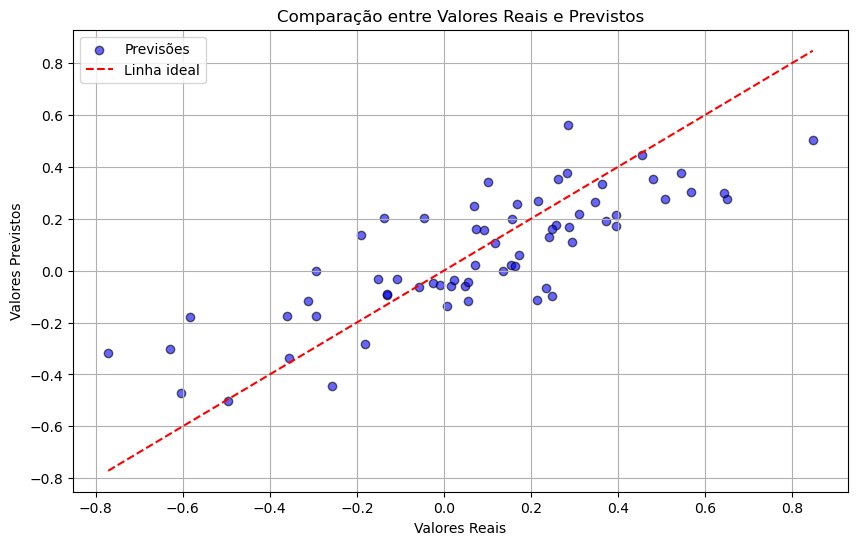

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_teste, y_previsao, color='blue', edgecolors='k', alpha=0.6, label='Previsões')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'r--', label='Linha ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.legend()
plt.grid(True)
plt.show()

O modelo está fazendo previsões relativamente boas, pois a maioria dos pontos está próxima da linha ideal, indicando uma boa correlação entre os valores reais e previstos. Apesar de existirem alguns casos onde o modelo comete erros mais significativos, o que pode justificar ajustes adicionais ou a consideração de outliers no conjunto de dados.
Possível próximo passo: Poderia ser interessante investigar mais a fundo os casos em que o modelo está cometendo os maiores erros, identificar padrões nesses desvios e considerar ajustes no modelo ou nas features.

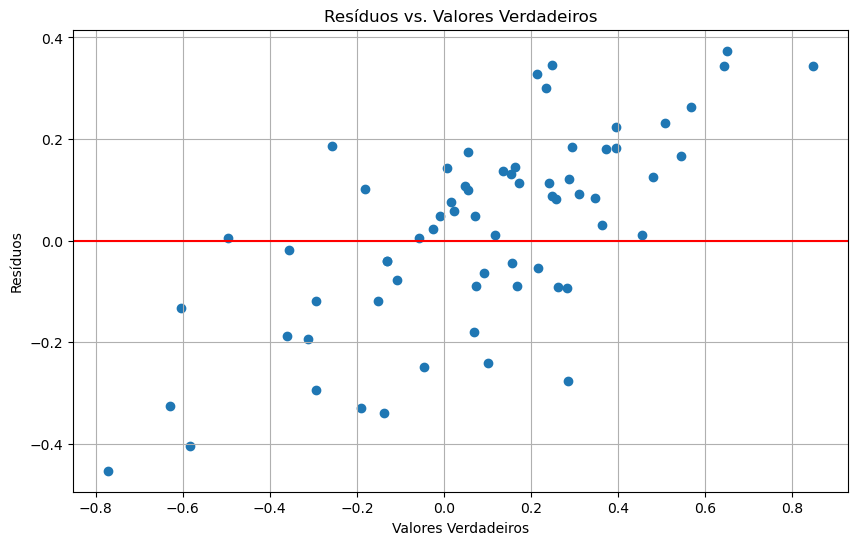

In [81]:
#Fazer análise de resíduos

residuos = y_verdadeiro - y_previsao

plt.figure(figsize=(10, 6))
plt.scatter(y_verdadeiro, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Verdadeiros')
plt.grid(True)
plt.show()

O gráfico sugere que o modelo está fazendo previsões razoáveis, com erros distribuídos uniformemente ao redor de zero. A ausência de um padrão claro sugere que o modelo não está deixando de capturar uma relação sistemática, o que é bom.

Por fim, vamos analisar melhor qual dos features tem a maior importãncia em determinar nosso target

In [85]:
#mostrar a importância das features

importancias = modelo.feature_importances_

for i, coluna in enumerate(features): #enumerate serve para pegar o índice e o valor da lista
    print(f"Importância da feature '{coluna}': {importancias[i]:.2f}")



Importância da feature 's': 0.34
Importância da feature 'a': 0.22
Importância da feature 'b': 0.20
Importância da feature 'v': 0.24


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


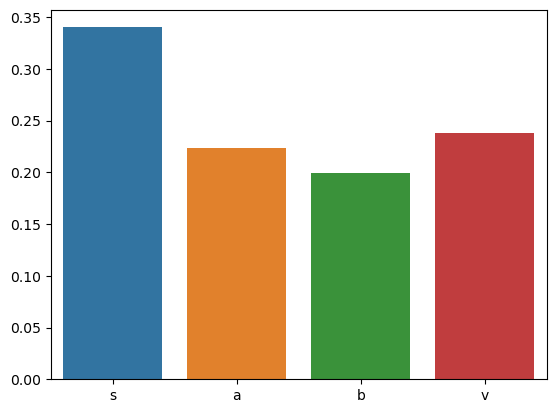

In [74]:
#como podemos ver, a feature 's' é a mais importante para o modelo
import seaborn as sns
eixo = sns.barplot(x=features, y=importancias)


Com isso, podemos ver a vantagem do atributos "s" em relação aos demais para determinar o nosso target.

## Conclusão

Por meio desse notebook conclui-se então que, tendo acesso ao dataset de interesse e analisando as características dos dados contidos dele é possível estabelecer a adoção vantajosa de um modelo de previsão compatível com o formato do banco de dados e com o objetivo proposto pelo grupo. Uma interpretação mais aprofundada do que é observado de forma objetiva nesse notebook está contida no relatório disponivel no Github.

Ademais, conseguimos medir a relevância de cada um dos atributos para a previsão do target possibilitando demonstrar as diferentes participações de cada um deles, evidenciando a complexidade do processo de regressão realizado pelo formato de Floresta Aleatória.

Por fim, utilizando essas diversas informações em conjunto de maneira coerente e otimizada foi possível alcançar um resultado satisfatório nesse projeto desenvolvido em equipe.